Name:Gottapu Leela satya swarup sai



Roll number :12040580


Refrences used to complete the assigment
1.https://www.kaggle.com/code/varunsaikanuri/life-expectancy-visualization-and-prediction
2.https://www.kaggle.com/code/greyisbetter/correlations-in-life-expectancy-data-by-who

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"satyaswarup3","key":"e59999ac6bb7d9f2b0d393fefd4d2e7e"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c new-york-city-taxi-fare-prediction

100% 1.56G/1.56G [00:21<00:00, 65.9MB/s]
100% 1.56G/1.56G [00:21<00:00, 77.4MB/s]


In [5]:
!unzip new-york-city-taxi-fare-prediction

Archive:  new-york-city-taxi-fare-prediction.zip
  inflating: GCP-Coupons-Instructions.rtf  
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split


In [7]:
train = pd.read_csv("/content/train.csv", nrows = 1000000)
test = pd.read_csv("/content/test.csv")
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [8]:
print("Shape of the Training data :", train.shape)
print("All columns are :", list(train.columns))

Shape of the Training data : (1000000, 8)
All columns are : ['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   key                1000000 non-null  object 
 1   fare_amount        1000000 non-null  float64
 2   pickup_datetime    1000000 non-null  object 
 3   pickup_longitude   1000000 non-null  float64
 4   pickup_latitude    1000000 non-null  float64
 5   dropoff_longitude  999990 non-null   float64
 6   dropoff_latitude   999990 non-null   float64
 7   passenger_count    1000000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 61.0+ MB


There are null values in both dropoff_longitude and dropoff_latitude

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                9914 non-null   object 
 1   pickup_datetime    9914 non-null   object 
 2   pickup_longitude   9914 non-null   float64
 3   pickup_latitude    9914 non-null   float64
 4   dropoff_longitude  9914 non-null   float64
 5   dropoff_latitude   9914 non-null   float64
 6   passenger_count    9914 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 542.3+ KB


We can see no null values in test set.

**Data cleaning**

In [11]:
train=train.dropna(subset=["dropoff_longitude"])
train=train.dropna(subset=["dropoff_latitude"])

We dropped the Nan corresponding values from the dataset,as there are less null values it is better to drop.

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999990 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                999990 non-null  object 
 1   fare_amount        999990 non-null  float64
 2   pickup_datetime    999990 non-null  object 
 3   pickup_longitude   999990 non-null  float64
 4   pickup_latitude    999990 non-null  float64
 5   dropoff_longitude  999990 non-null  float64
 6   dropoff_latitude   999990 non-null  float64
 7   passenger_count    999990 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 68.7+ MB


In [13]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000
mean,11.347953,-72.526699,39.929040,-72.527860,39.919954,1.684941
std,9.821790,12.057778,7.626087,11.324494,8.201418,1.323907
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734046,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967094,40.767154,-73.963654,40.768129,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


In [14]:
#positive fare_amount,positive passenger_count
train.drop(train[train.fare_amount < 0].index, inplace=True)
train = train[train['passenger_count'] >0]

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996397 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                996397 non-null  object 
 1   fare_amount        996397 non-null  float64
 2   pickup_datetime    996397 non-null  object 
 3   pickup_longitude   996397 non-null  float64
 4   pickup_latitude    996397 non-null  float64
 5   dropoff_longitude  996397 non-null  float64
 6   dropoff_latitude   996397 non-null  float64
 7   passenger_count    996397 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 68.4+ MB


In [16]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,996397.000000,996397.000000,996397.000000,996397.000000,996397.000000,996397.000000
mean,11.357829,-72.525848,39.928485,-72.527388,39.919569,1.690954
std,9.831130,12.066290,7.633486,11.329665,8.209810,1.322430
min,0.000000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,1.000000
25%,6.000000,-73.992060,40.734960,-73.991383,40.734043,1.000000
50%,8.500000,-73.981792,40.752692,-73.980134,40.753163,1.000000
75%,12.500000,-73.967091,40.767152,-73.963648,40.768128,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


In [17]:
train=train.drop("key",axis=1)

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996397 entries, 0 to 999999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        996397 non-null  float64
 1   pickup_datetime    996397 non-null  object 
 2   pickup_longitude   996397 non-null  float64
 3   pickup_latitude    996397 non-null  float64
 4   dropoff_longitude  996397 non-null  float64
 5   dropoff_latitude   996397 non-null  float64
 6   passenger_count    996397 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 60.8+ MB


In [19]:
train = train[(train['pickup_longitude']<180) & (-180<train['pickup_longitude'])]
train = train[(-90<train['pickup_latitude']) & (train['pickup_latitude']<90)]

As there is a range for latitudes and longitudes,dropping the values which are out of the range.

**Visualization**

<ipython-input-20-80003508fcaf>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['fare_amount']);


Text(0.5, 1.0, 'Distribution of Fare')

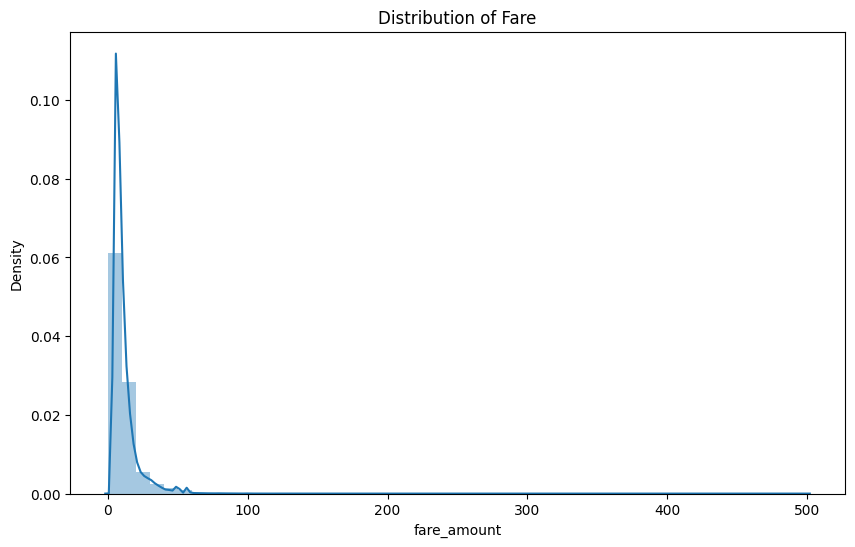

In [20]:
plt.figure(figsize = (10, 6))
sns.distplot(train['fare_amount']);
plt.title('Distribution of Fare')

<ipython-input-21-fca066f924aa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=train.corr()


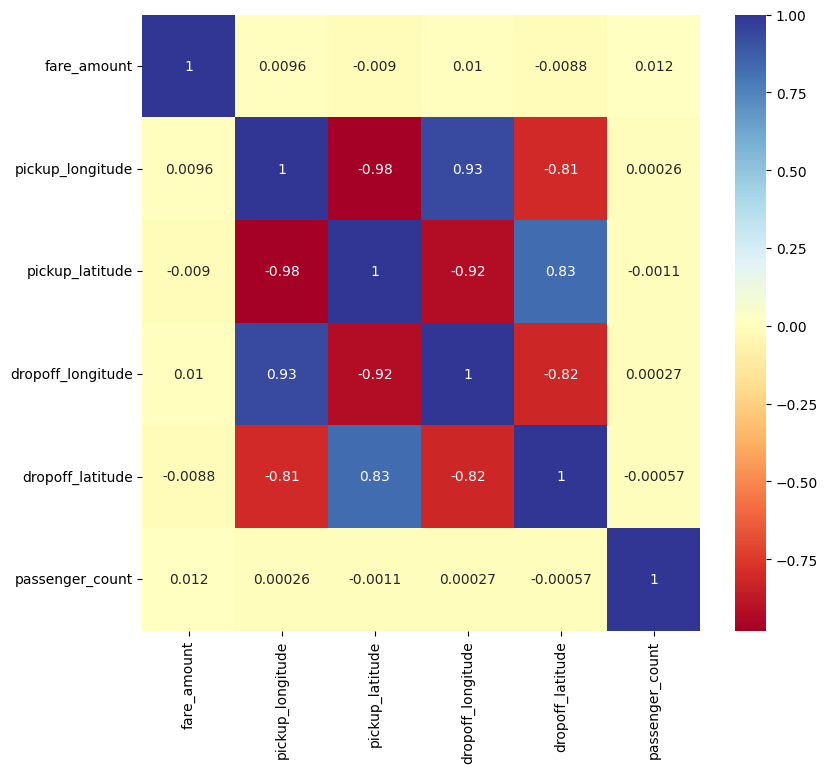

In [21]:
plt.figure(figsize=(9,8))
cor=train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.RdYlBu)
plt.show()

Here we can observe correlations of fare amount with all and correlations among the features.Our focus is more on the features which have more correlation with fare amount.

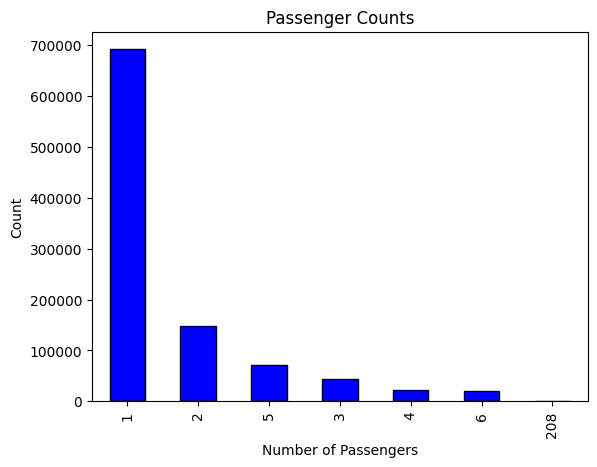

In [22]:
train['passenger_count'].value_counts().plot.bar(color = 'b', edgecolor = 'k');
plt.title('Passenger Counts'); plt.xlabel('Number of Passengers'); plt.ylabel('Count');

Based on the graph we can remove any passengers greater than 6,as there are not much of them

In [23]:
#removing outliers

train = train[train['fare_amount'].between(left = 2.5, right = 100)]
train = train.loc[train['passenger_count'] < 6]
train = train.loc[train['pickup_latitude'].between(40, 42)]
train = train.loc[train['pickup_longitude'].between(-75, -72)]
train = train.loc[train['dropoff_latitude'].between(40, 42)]
train = train.loc[train['dropoff_longitude'].between(-75, -72)]


From the new york city map coordinates we can narrow down the latitudes and longitudes.If we need more accuracy we can just drop the latitudes less than 2 percentile and greater than 98 percentile,it just makes the data less.
From observing the fare amount distribution above we can narrow down the fare amount to a range.

In [24]:
train['pickup_datetime']  = pd.to_datetime(train['pickup_datetime'])
test['pickup_datetime']  = pd.to_datetime(test['pickup_datetime'])

In [25]:
data = [train,test]
for i in data:
    i['Year'] = i['pickup_datetime'].dt.year
    i['Month'] = i['pickup_datetime'].dt.month
    i['Date'] = i['pickup_datetime'].dt.day
    i['Day of Week'] = i['pickup_datetime'].dt.dayofweek
    i['Hour'] = i['pickup_datetime'].dt.hour

In [26]:
def haversine_distance(lat1, long1, lat2, long2):
    data = [train, test]
    for i in data:
        R = 6371  #radius of earth in kilometers
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])

        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])

        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2

        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))

        #d = R*c
        d = (R * c) #in kilometers
        i['H_Distance'] = d
    return d

In [27]:
haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

0        2.323260
1        2.425353
2        0.618628
3        1.961033
4        5.387301
          ...    
9909     2.124874
9910     3.270969
9911    19.183941
9912     8.343486
9913     1.180825
Length: 9914, dtype: float64

In [28]:
train=train.drop("pickup_datetime",axis=1)

As it is now divided into year,month etc.So now it can be dropped.

1. Does the number of passengers affect the fare?
From corr matrix,we can say passengers affect the fare very little.

2. Does the date and time of pickup affect the fare?
Yes from corr matrix year has much signifcant effect on fare amount

3.Does the day of the week affect the fare?
day of week has very little affect on fare amount

4.Does the distance affect the fare?
yes distance affecting the fare

**Data scaling**

In [29]:
#data scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_s=ss.fit_transform(train)
train=pd.DataFrame(train_s,
                   columns=train.columns)

In [30]:
train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day of Week,Hour,H_Distance
0,-0.724695,3.359419,-0.991519,3.500694,-1.183006,-0.517876,-1.453580,-0.078498,-0.079798,-1.558554,0.535752,-0.611104
1,0.602106,-1.049257,-1.325377,-0.132049,0.926445,-0.517876,-0.917780,-1.533147,-1.231688,-1.045676,0.382252,1.366997
2,-0.596295,-0.194153,0.340144,-0.448039,-0.024784,0.348916,-0.381979,0.503361,0.265769,-0.019919,-2.073740,-0.515454
3,-0.382295,-0.306901,-0.597397,-0.456615,0.203025,-0.517876,0.153821,-0.660358,0.611335,1.005838,-1.459742,-0.139597
4,-0.639095,0.181749,0.564738,0.464699,0.979631,-0.517876,-0.917780,-0.951287,-0.770932,-1.045676,-0.999243,-0.352918


In [31]:
x=train.drop("fare_amount",1)
y=train["fare_amount"]

<ipython-input-31-793de0b1e9ef>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x=train.drop("fare_amount",1)


In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(715918, 11) (715918,)
(238640, 11) (238640,)


In [33]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV


**Building a pipeline**

In [34]:
pipe = Pipeline([
('scaler', StandardScaler()),
('selector', VarianceThreshold())
])

In [35]:
parameters = {'scaler': [StandardScaler(), MinMaxScaler(),
	Normalizer(), MaxAbsScaler()],
	'selector__threshold': [0, 0.001, 0.01]
}

**Validation**

In [37]:
lrm=linear_model.LinearRegression()

In [39]:
#kfold cross validation mean scores

from sklearn.model_selection import cross_val_score

scores = cross_val_score(lrm,
                         x,
                         y,
                         scoring="neg_mean_squared_error",
                         cv=10)

linear_rmse_scores = np.sqrt(-scores)

print("Scores:", linear_rmse_scores)
print("Mean:", linear_rmse_scores.mean())
print("Standard deviation:", linear_rmse_scores.std())

Scores: [0.55674481 0.55741839 0.53998337 0.54591317 0.52563857 0.53708817
 0.5441855  0.53723895 0.54427043 0.53195414]
Mean: 0.5420435501544743
Standard deviation: 0.009485976637584086


In [40]:
lrm_model = lrm.fit(x_train,y_train)

In [41]:
lrm_predictions = lrm.predict(x_test)

In [42]:
print('Score',lrm_model.score(x_test,y_test))

Score 0.7181724780808763


In [43]:
test=test.drop("key",axis=1)

In [44]:

test=test.drop("pickup_datetime",axis=1)

In [45]:
y_pred = lrm_model.predict(test)

In [46]:
prediction = pd.DataFrame(y_pred,columns=['fare_amount'])

In [47]:
prediction.to_csv('fare_amount.csv')